In [169]:
!pip install google-play-scraper
!pip install seaborn

In [170]:
from google_play_scraper import app
import pandas as pd
import numpy as np

import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [171]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    "com.miHoYo.GenshinImpact",
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=1000, # defaults to 100
    filter_score_with=None # defaults to None(means all score)
)

In [172]:
df = pd.DataFrame(np.array(result), columns=['review'])

df = df.join(pd.DataFrame(df.pop('review').tolist()))

df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,91499cc2-4cbd-4995-a09a-868172ef0519,Yanuar Bagus Pratama,https://play-lh.googleusercontent.com/a/ACg8oc...,Gamenya sangat bagus & tidak pasaran. Tapi tol...,4,2450,4.3.0_19705728_19706476,2024-01-04 00:12:47,None,NaT,4.3.0_19705728_19706476
1,56fb5e28-882d-43e8-a704-9d1148af5027,Wei Yuze,https://play-lh.googleusercontent.com/a-/ALV-U...,"Bagus tapi, aku belum bisa main lagi soalnya g...",3,810,4.3.0_19705728_19706476,2024-01-10 11:25:37,None,NaT,4.3.0_19705728_19706476
2,6964238a-572e-4e62-afb8-a597251dfe4e,Yoga AR,https://play-lh.googleusercontent.com/a-/ALV-U...,Dari grafik dan story juga bagus termasuk game...,5,960,4.3.0_19705728_19706476,2024-01-18 10:46:06,None,NaT,4.3.0_19705728_19706476
3,f4d9a7b8-d362-4da8-8298-e397dc7b5c19,Tiara 14,https://play-lh.googleusercontent.com/a/ACg8oc...,Sejauh ini main Genshin nggak ada keluhan sama...,5,12,4.3.0_19705728_19706476,2024-01-26 07:22:54,None,NaT,4.3.0_19705728_19706476
4,abbd087a-e673-4c52-8c75-cd3c6334975c,hayu pratiwi,https://play-lh.googleusercontent.com/a-/ALV-U...,"Gamenya bagus, cuma misinya banyak yang susah ...",4,15,4.3.0_19705728_19706476,2024-01-14 18:46:55,None,NaT,4.3.0_19705728_19706476


In [173]:
len(df.index)

1000

In [174]:
df[["userName", "score", "at", "content"]].head()

,userName,score,at,content
0,Yanuar Bagus Pratama,4,2024-01-04 00:12:47,Gamenya sangat bagus & tidak pasaran. Tapi tol...
1,Wei Yuze,3,2024-01-10 11:25:37,"Bagus tapi, aku belum bisa main lagi soalnya g..."
2,Yoga AR,5,2024-01-18 10:46:06,Dari grafik dan story juga bagus termasuk game...
3,Tiara 14,5,2024-01-26 07:22:54,Sejauh ini main Genshin nggak ada keluhan sama...
4,hayu pratiwi,4,2024-01-14 18:46:55,"Gamenya bagus, cuma misinya banyak yang susah ..."


In [175]:
new_df = df[["userName", "score", "at", "content"]]
sorted_df = new_df.sort_values(by=['at'], ascending=False)
sorted_df.head()

,userName,score,at,content
3,Tiara 14,5,2024-01-26 07:22:54,Sejauh ini main Genshin nggak ada keluhan sama...
458,Benjamin Edward,5,2024-01-19 14:52:57,👍👍mantap nih game udah bagus gambar nya kayak ...
853,Anindya Hasto,5,2024-01-18 13:47:10,Grafik dan alur cerita yang sangat bagus aku s...
464,Maha raja Harimau putih,5,2024-01-18 12:07:16,Gamenya bagus rasanya seperti nonton anime gen...
2,Yoga AR,5,2024-01-18 10:46:06,Dari grafik dan story juga bagus termasuk game...


In [176]:
df_final = sorted_df[['content', 'score']]
df_final.head()

,content,score
3,Sejauh ini main Genshin nggak ada keluhan sama...,5
458,👍👍mantap nih game udah bagus gambar nya kayak ...,5
853,Grafik dan alur cerita yang sangat bagus aku s...,5
464,Gamenya bagus rasanya seperti nonton anime gen...,5
2,Dari grafik dan story juga bagus termasuk game...,5


# PELABELAN

In [177]:
def pelabelan(score):
    if score > 3:
        return 'positif'
    else:
        return 'negatif'
df_final['sentimen'] = df_final['score'].apply(pelabelan)
df_final.head(10)

/tmp/ipykernel_34/3359541815.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['sentimen'] = df_final['score'].apply(pelabelan)


,content,score,sentimen
3,Sejauh ini main Genshin nggak ada keluhan sama...,5,positif
458,👍👍mantap nih game udah bagus gambar nya kayak ...,5,positif
853,Grafik dan alur cerita yang sangat bagus aku s...,5,positif
464,Gamenya bagus rasanya seperti nonton anime gen...,5,positif
2,Dari grafik dan story juga bagus termasuk game...,5,positif
84,"Jujur ini game paling lama yang gua mainin, ha...",3,negatif
443,banget menyengsarakan tapi untuk ukuran terlal...,5,positif
101,"Hallo, ini game sungguh memuaskan dri segi apa...",5,positif
453,semoga nantinya android bisa ditambahkan kontr...,5,positif
461,"Udah bagus sih, cuman saya harap untuk versi a...",5,positif


In [178]:
def pelabelan(score):
    if score > 3:
        return 1
    else:
        return 0
df_final['label'] = df_final['score'].apply(pelabelan)
df_final.head(10)

,content,score,sentimen,label
3,Sejauh ini main Genshin nggak ada keluhan sama...,5,positif,1
458,👍👍mantap nih game udah bagus gambar nya kayak ...,5,positif,1
853,Grafik dan alur cerita yang sangat bagus aku s...,5,positif,1
464,Gamenya bagus rasanya seperti nonton anime gen...,5,positif,1
2,Dari grafik dan story juga bagus termasuk game...,5,positif,1
84,"Jujur ini game paling lama yang gua mainin, ha...",3,negatif,0
443,banget menyengsarakan tapi untuk ukuran terlal...,5,positif,1
101,"Hallo, ini game sungguh memuaskan dri segi apa...",5,positif,1
453,semoga nantinya android bisa ditambahkan kontr...,5,positif,1
461,"Udah bagus sih, cuman saya harap untuk versi a...",5,positif,1


In [179]:
df_final.to_csv('genshin.csv', index=False)

# data cleaning

In [180]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('genshin.csv')
df.head(10)

,content,score,sentimen,label
0,Sejauh ini main Genshin nggak ada keluhan sama...,5,positif,1
1,👍👍mantap nih game udah bagus gambar nya kayak ...,5,positif,1
2,Grafik dan alur cerita yang sangat bagus aku s...,5,positif,1
3,Gamenya bagus rasanya seperti nonton anime gen...,5,positif,1
4,Dari grafik dan story juga bagus termasuk game...,5,positif,1
5,"Jujur ini game paling lama yang gua mainin, ha...",3,negatif,0
6,banget menyengsarakan tapi untuk ukuran terlal...,5,positif,1
7,"Hallo, ini game sungguh memuaskan dri segi apa...",5,positif,1
8,semoga nantinya android bisa ditambahkan kontr...,5,positif,1
9,"Udah bagus sih, cuman saya harap untuk versi a...",5,positif,1


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1000 non-null   object
 1   score     1000 non-null   int64 
 2   sentimen  1000 non-null   object
 3   label     1000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [182]:
df.isna()

,content,score,sentimen,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [183]:
df.isnull().sum()

content     0
score       0
sentimen    0
label       0
dtype: int64

# text preprocessing

In [184]:
df.head(10)

,content,score,sentimen,label
0,Sejauh ini main Genshin nggak ada keluhan sama...,5,positif,1
1,👍👍mantap nih game udah bagus gambar nya kayak ...,5,positif,1
2,Grafik dan alur cerita yang sangat bagus aku s...,5,positif,1
3,Gamenya bagus rasanya seperti nonton anime gen...,5,positif,1
4,Dari grafik dan story juga bagus termasuk game...,5,positif,1
5,"Jujur ini game paling lama yang gua mainin, ha...",3,negatif,0
6,banget menyengsarakan tapi untuk ukuran terlal...,5,positif,1
7,"Hallo, ini game sungguh memuaskan dri segi apa...",5,positif,1
8,semoga nantinya android bisa ditambahkan kontr...,5,positif,1
9,"Udah bagus sih, cuman saya harap untuk versi a...",5,positif,1


# case folding
text preprocessing

In [185]:
import re

def text_preprocessing(text):
    text = text.lower() #mengubah text jadi lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text) #menghapus url
    text = re.sub(r'[-+]?[0-9]+', '', text) #menghapus angka
    text = re.sub(r'[^\w\s]', '', text) #menghapus tanda baca
    text = text.strip() #menghapus white space
    return text

# def text_preprocessing(df, text_field, new_text_field_name):
#     df[new_text_field_name] = df[text_field].str.lower()
#     df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub('[^a-zA-Z]', ' ', elem))
#     return df

In [186]:
df['content'] = df['content'].apply(text_preprocessing)
df.head(10)

,content,score,sentimen,label
0,sejauh ini main genshin nggak ada keluhan sama...,5,positif,1
1,mantap nih game udah bagus gambar nya kayak re...,5,positif,1
2,grafik dan alur cerita yang sangat bagus aku s...,5,positif,1
3,gamenya bagus rasanya seperti nonton anime gen...,5,positif,1
4,dari grafik dan story juga bagus termasuk game...,5,positif,1
5,jujur ini game paling lama yang gua mainin ham...,3,negatif,0
6,banget menyengsarakan tapi untuk ukuran terlal...,5,positif,1
7,hallo ini game sungguh memuaskan dri segi apap...,5,positif,1
8,semoga nantinya android bisa ditambahkan kontr...,5,positif,1
9,udah bagus sih cuman saya harap untuk versi an...,5,positif,1


# stopword removal

In [187]:
!pip install nltk

In [188]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('indonesian')
df['content'] = df['content'].apply(lambda x:' ' .join([word for word in x.split() if word not in (stop)]))
df.head(10)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,sentimen,label
0,main genshin nggak keluhan grafik story and mi...,5,positif,1
1,mantap nih game udah bagus gambar nya kayak re...,5,positif,1
2,grafik alur cerita bagus sukaaaa,5,positif,1
3,gamenya bagus nonton anime genre petualang gak...,5,positif,1
4,grafik story bagus gameplaynya overall saran t...,5,positif,1
5,jujur game gua mainin mainin gi ga bosen karna...,3,negatif,0
6,banget menyengsarakan ukuran data gb oke,5,positif,1
7,hallo game sungguh memuaskan dri segi apapun b...,5,positif,1
8,semoga android kontrol keyboard joystick,5,positif,1
9,udah bagus sih cuman harap versi android pakai...,5,positif,1


# tokenizing
proses pemisahan text menjadi potongan-potongan yg disebut token untuk kemudian di analisa (kata simbol tanda baca) dapat dianggap sebagai token 

In [189]:
!pip install wordcloud

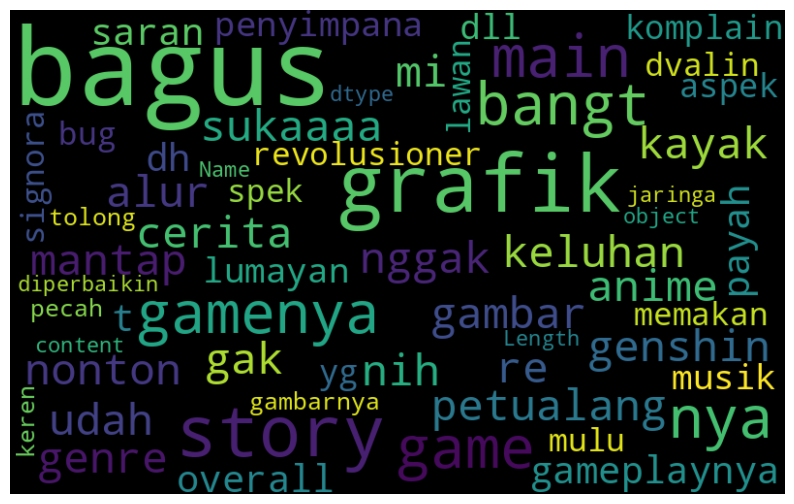

In [190]:
#import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(str(df['content']))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# stemmingg
proses pemetaan dan penguraian bentuk dari suatu kata menjadi kata dasarnya, untuk bahasa indo bisa pakai sastrawi 

In [191]:
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# def stemmed_wrapper(term):
#     return stemmer.stem(term)

# term_dict = {}
# hitung = 0

# for document in data_clean['text_tokenize']:
#     for term in document:
#         if term not in term_dict:
#             term_dict[term] = ' '

# print(len(term_dict))
# print("---------------------------")
# for term in term_dict:
#     term_dict[term] = stemmed_wrapper(term)
#     hitung += 1
# print(hitung, ":", term, ":" , term_dict[term])

# print(term_dict)
# print("---------------------------")

# def get_stemmed_term(document):
#     return [term_dict[term] for term in document]

# data_clean['text_stemmed'] = data_clean['text_tokenize'].apply(lambda x: ' '.join(get_stemmed_term(x)))
# data_clean.head(10)

# split data

In [192]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['label'], test_size=0.2, random_state=0)

In [193]:
data = df[['content', 'label']]
data.head()

,content,label
0,main genshin nggak keluhan grafik story and mi...,1
1,mantap nih game udah bagus gambar nya kayak re...,1
2,grafik alur cerita bagus sukaaaa,1
3,gamenya bagus nonton anime genre petualang gak...,1
4,grafik story bagus gameplaynya overall saran t...,1


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   label    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   label    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [196]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.2)
df_val, df_test = train_test_split(df_test, test_size=0.5)

df_train.shape, df_test.shape, df_val.shape

((800, 2), (100, 2), (100, 2))

In [197]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 672 to 817
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  800 non-null    object
 1   label    800 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.8+ KB


# load tokenizer

In [198]:
#define model fine tuning
PRE_TRAINED_MODEL = 'indobenchmark/indobert-base-p2'

In [199]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL)

In [200]:
#lihat vocabulary
vocabulary = bert_tokenizer.get_vocab()

print('Panjang Vocab : ', len(vocabulary))
# print(vocabulary)

Panjang Vocab :  30521


In [201]:
#test tokenize
id_data = 2
print('Kalimat : ', data.content[id_data])
print('BERT Tokenizer : ', bert_tokenizer.tokenize(data.content[id_data]))

Kalimat :  grafik alur cerita bagus sukaaaa
BERT Tokenizer :  ['grafik', 'alur', 'cerita', 'bagus', 'suka', '##aaa']


# input formating
encode text jadi token sebelum masuk model

In [202]:
#fungsi encode

bert_input = bert_tokenizer.encode_plus(
    data.content[id_data],            # sample kalimat
    add_special_tokens = True,        # tambah token [cls] diawal dan [sep] diakhir
    padding = 'max_length',           # tambah padding ke max length
    truncation = 'longest_first',     # truncate text jika lebih dari max length
    max_length = 50,                  # max length
    return_attention_mask = True,     # mengembalikan nilai attention mask
    return_token_type_ids = True      # mengembalikan nilai token type id(sement embedding)
)

#fungsi encode plus mengembalikan nilai : input ids, token type ids, attention mask
bert_input.keys()


dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [203]:
print(bert_input)

{'input_ids': [2, 8241, 8599, 1634, 1305, 1506, 10097, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [204]:
#menampilkan informasi
print('Kalimat\t\t: ', data.content[id_data])
print('Tokenizer\t: ', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))
print('Input IDs\t: ', bert_input['input_ids'])
print('Token Type IDs\t: ', bert_input['token_type_ids'])
print('Attention mask\t: ', bert_input['attention_mask'])

Kalimat		:  grafik alur cerita bagus sukaaaa
Tokenizer	:  ['[CLS]', 'grafik', 'alur', 'cerita', 'bagus', 'suka', '##aaa', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	:  [2, 8241, 8599, 1634, 1305, 1506, 10097, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Token Type IDs	:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention mask	:  [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# memilih panjang sequance (max length)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


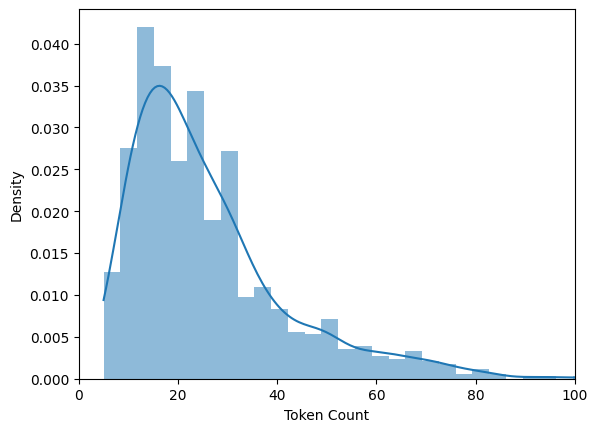

In [205]:
token_lens = []

for txt in data.content:
    tokens = bert_tokenizer.encode(txt)
    token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token Count');

In [206]:
MAX_LEN = 100

# format data train and test

In [207]:
#fungsi gabungkan tokenize, spesial token dll
def convert_example_to_feature(sentence):
    return bert_tokenizer.encode_plus(
    sentence,                         # sample kalimat
    add_special_tokens = True,        # tambah token [cls] diawal dan [sep] diakhir
    padding = 'max_length',           # tambah padding ke max length
    truncation = 'longest_first',     # truncate text jika lebih dari max length
    max_length = MAX_LEN,             # max length
    return_attention_mask = True,     # mengembalikan nilai attention mask
    return_token_type_ids = True      # mengembalikan nilai token type id(sement embedding)
    )

In [208]:
#fungsi untuk memetakan input hasil formating agar sesuai dengan bert
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
    return {
        "input_ids": input_ids,                 #token embedding
        "token_type_ids": token_type_ids,       #segment embedding
        "attention_mask": attention_masks,      #filter informasi kalkulasi model
    }, label

In [209]:
def encode(data):
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []
    
    for row in data.itertuples(index=False):
        sentence = row.content
        label = row.label
        bert_input = convert_example_to_feature(sentence)
        
        input_ids_list.append(bert_input['input_ids'])
        token_type_ids_list.append(bert_input['token_type_ids'])
        attention_mask_list.append(bert_input['attention_mask'])
        label_list.append(['label'])
        
    return tf.data.Dataset.from_tensor_slices((input_ids_list, token_type_ids_list, attention_mask_list, label_list)).map(map_example_to_dict)

In [210]:
#menentukan nilai hyperparameter untuk finetuning
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 5e-5

In [211]:
#input formating menggunakan funggsi sebelumnya pada keseluruhan data
train_encoded = encode(df_train).batch(BATCH_SIZE)
test_encoded = encode(df_test).batch(BATCH_SIZE)
val_encoded = encode(df_val).batch(BATCH_SIZE)

In [212]:
print(train_encoded)

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 100), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, 100), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 100), dtype=tf.int32, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.string, name=None))>


# load pre-trained model

In [213]:
from transformers import TFBertForSequenceClassification

#load model
bert_model = TFBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels = 2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [214]:
#menentukan optimizer

optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy("accuracy")

#compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Fine tuning

In [215]:
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

Epoch 1/5


UnimplementedError: Graph execution error:

Detected at node Cast_1 defined at (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code

  File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 701, in start

  File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/opt/conda/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 523, in process_one

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/opt/conda/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_34/2039290323.py", line 1, in <module>

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/opt/conda/lib/python3.10/site-packages/transformers/modeling_tf_utils.py", line 1676, in train_step

  File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 620, in update_state

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated

  File "/opt/conda/lib/python3.10/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn

  File "/opt/conda/lib/python3.10/site-packages/keras/src/metrics/base_metric.py", line 708, in update_state

2 root error(s) found.
  (0) UNIMPLEMENTED:  Cast string to float is not supported
	 [[{{node Cast_1}}]]
  (1) CANCELLED:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_116161]

In [ ]:
#plot hasil

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
#simpan
bert_model.save_weights('bert_model.h5')

# EVALUATE

In [ ]:
#eval
score = bert_model.evaluate(test_encoded)
print("test accuracy", score[1])

In [ ]:
#prediksi menggunakkan bert pada data uji
predicted_raw = bert_model.predict(test_encoded)

y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['label'])

In [ ]:
#hitung akurasi
from sklearn.metrics import accuracy_score
from sklearn.metrics import confution_matrix

accuracy_score(y_true, y_pred)

In [ ]:
#confution matrix
confution_matrix(y_true, y_pred)